# Context:

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "output" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

# Attribute Information:

1. age: age in years
2. sex: 1 = male; 0 = female
3. cp: chest pain type
- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic
4. trtbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes’ criteria
8. thalachh: maximum heart rate achieved
9. exng: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slp: the slope of the peak exercise ST segment
- Value 1: upsloping
- Value 2: flat
- Value 3: downsloping
12. caa: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

# Predicting heart disease using machine learning

I am going to take the following approach by performing an Exploratory Data Analysis(EDA) and making predictions:

1. Context and Define the problem statement.
2. Explore and Visualize feature data.
3. Find relationships between features.
4. Evaluating performance metrics.
5. Modeling and making Predictions

* PLEASE NOTE THAT ALL OBSERVATIONS IS NOT TO BE TAKEN AS A RECOMMENDED MEDICAL PRESCRIPTION. IT WAS DONE UNDER LITTLE RESEARCH WORK AND DONE MAINLY FOR THE PURPOSE OF DATA ANALYSIS.

# Problem Statement:

Heart diseases are a leading cause of death globally. Early detection of individuals at risk of heart disease is crucial for timely intervention and improved patient outcomes. This dataset contains a good number of information on patient demographics, medical history, and diagnostic measurements.

The challenge is to use this dataset to develop a machine learning model that can accurately predict the likelihood of an individual developing heart disease.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Reading the csv file

data = pd.read_csv('/content/heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# The data has 303 rows and 14 columns data.shape

data.shape

(303, 14)

In [ ]:
# Summary statistics of the data set

data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Summary of the data types and there are no missing values in our data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# There are 207 Males and 96 Females in our data
gender = data.sex.value_counts().rename('gender_count')
gender

,gender_count
sex,
1,207
0,96


<Axes: ylabel='Frequency'>

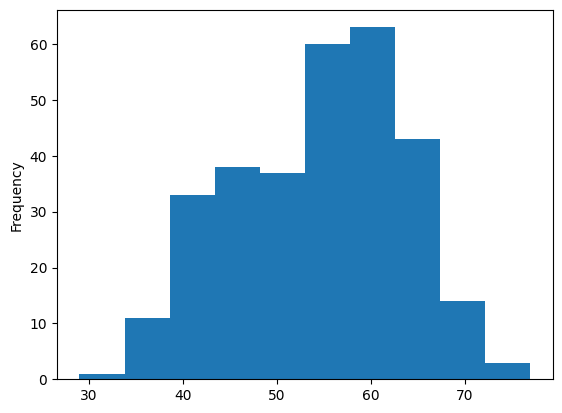

In [ ]:
# Displaying age distribution with histogram
age_dist = data.age.plot.hist()
age_dist

Observation:
The most concentrated age group in this data are from the age range of 55 to 65

In [ ]:
# The diagnosis results shows that 165 people have heart disease while 138 people doesn't

heart_dis_count = data.output.value_counts()
heart_dis_count

,count
output,
1,165
0,138


([<matplotlib.patches.Wedge at 0x796f57cea7d0>,
 [Text(-0.1534669293828939, 1.0892418930548835, '165'),
  Text(0.1534670313650796, -1.0892418786862677, '138')])

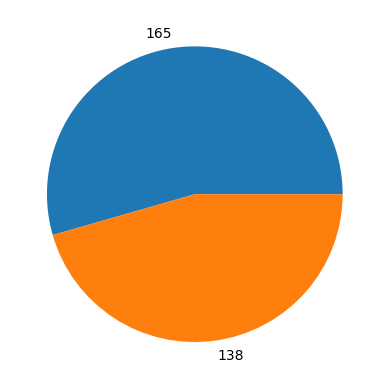

In [ ]:
# Visualizing the people that has heart disease
# 165 people has heart disease while 138 doesn't

plt.pie(heart_dis_count, labels=heart_dis_count)

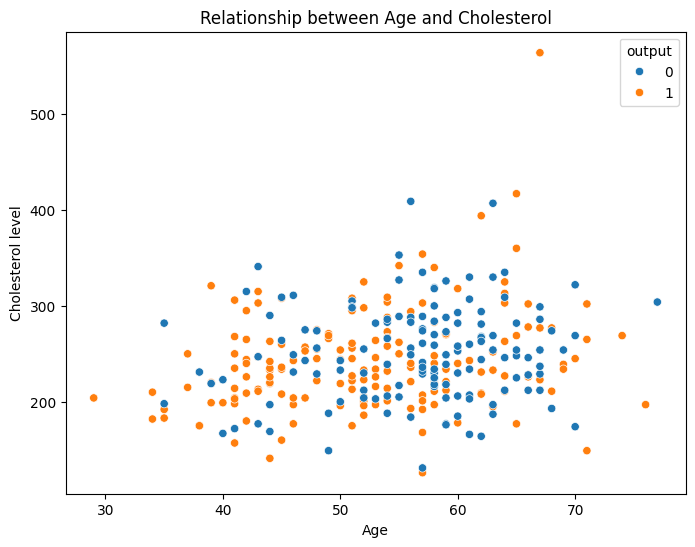

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='chol', hue='output', data=data)
plt.title('Relationship between Age and Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol level')
plt.show()

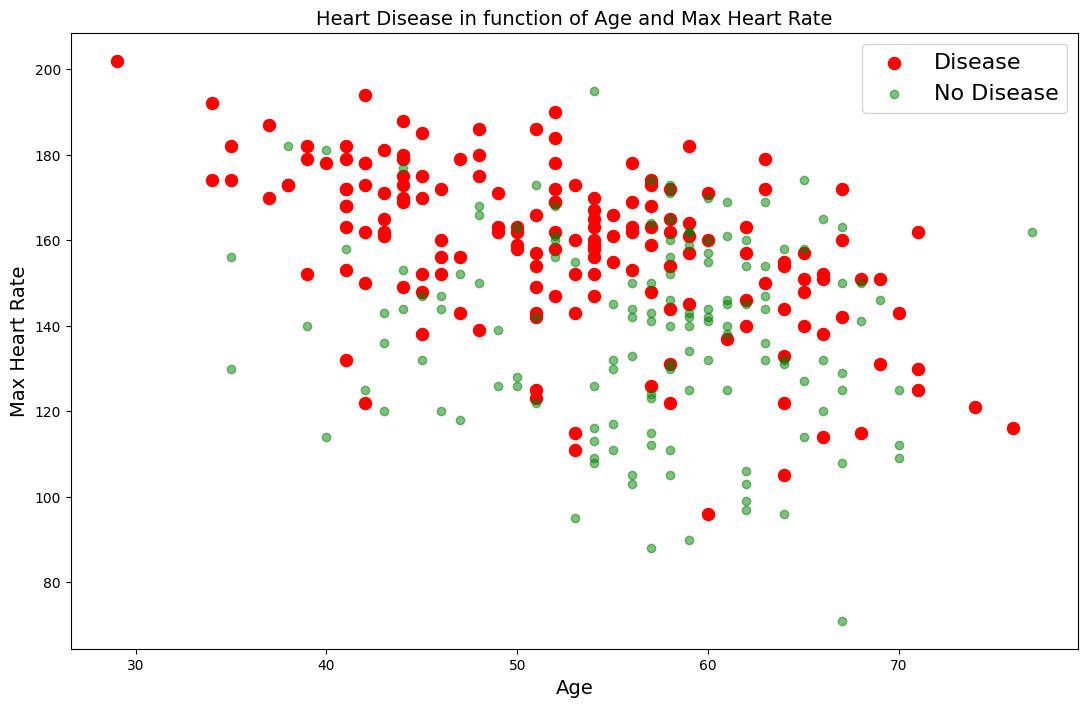

In [ ]:
plt.figure(figsize=(13, 8))
plt.scatter(data.age[data.output==1],data.thalachh[data.output==1],c="red",s=75)
plt.scatter(data.age[data.output==0],data.thalachh[data.output==0],c="green",alpha=0.5)
plt.title("Heart Disease in function of Age and Max Heart Rate",fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Max Heart Rate", fontsize=14)
plt.legend(["Disease", "No Disease"],fontsize=16);

In [ ]:
restecg_output = data.groupby(['restecg', 'output']).size()
restecg_output

restecg  output
0        0         79
         1         68
1        0         56
         1         96
2        0          3
         1          1
dtype: int64

<Axes: xlabel='restecg'>

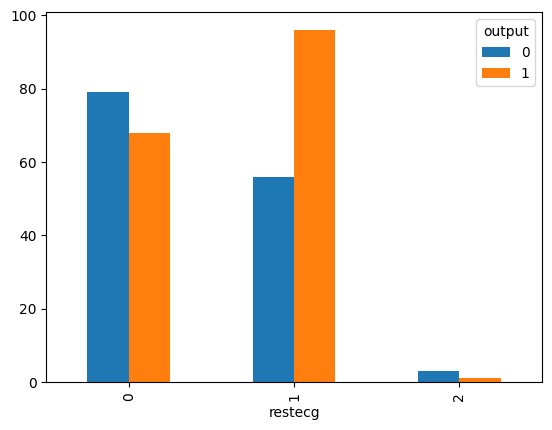

In [ ]:
restecg_output.unstack().plot(kind='bar')

Observation:

Most of the people with heart disease suffered from ST-Wave abnormality which suggests this is a huge concern and it requires immediate medical attention on the other hand people who tested normal for restecg a about 47% of them still had heart disease, suggesting the restecg is not really a factor for determining if a person will have heart disease.

In [ ]:
# Distinctive number of people at different oldpeak measurement

measure_0_2 = data[(data['oldpeak'] >= 0) & (data['oldpeak'] < 2)].groupby('oldpeak').size().reset_index(name='Gender_Count')
measure_2_4 = data[(data['oldpeak'] >= 2) & (data['oldpeak'] < 4)].groupby('oldpeak').size().reset_index(name='Gender_Count')
measure_4_6plus = data[data['oldpeak'] >= 4].groupby('oldpeak').size().reset_index(name='Gender_Count')

print("0-2mm:\n", measure_0_2)
print("\n2-4mm:\n", measure_2_4)
print("\n4-6mm+:\n", measure_4_6plus)

0-2mm:
     oldpeak  Gender_Count
0       0.0            99
1       0.1             7
2       0.2            12
3       0.3             3
4       0.4             9
5       0.5             5
6       0.6            14
7       0.7             1
8       0.8            13
9       0.9             3
10      1.0            14
11      1.1             2
12      1.2            17
13      1.3             1
14      1.4            13
15      1.5             5
16      1.6            11
17      1.8            10
18      1.9             5

2-4mm:
     oldpeak  Gender_Count
0       2.0             9
1       2.1             1
2       2.2             4
3       2.3             2
4       2.4             3
5       2.5             2
6       2.6             6
7       2.8             6
8       2.9             1
9       3.0             5
10      3.1             1
11      3.2             2
12      3.4             3
13      3.5             1
14      3.6             4
15      3.8             1

4-6mm+:
    oldpeak 

In [ ]:
# Suming them at different category of severity

'''
0-2mm for Mild Depression
2-4mm for Moderate Depression
4-6mm+ for Severe Depression
'''

print("Mild Depression:", measure_0_2['Gender_Count'].sum())
print("Moderate Depression:", measure_2_4['Gender_Count'].sum())
print("Severe Depression:", measure_4_6plus['Gender_Count'].sum())

Mild Depression: 244
Moderate Depression: 51
Severe Depression: 8


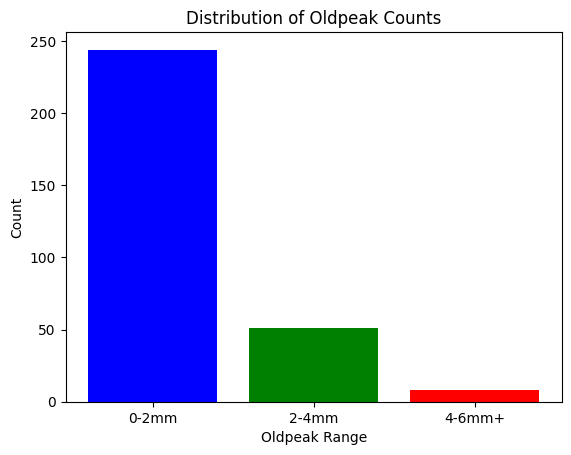

In [ ]:
# Extracting categories and counts
categories = ['0-2mm', '2-4mm', '4-6mm+']
counts = [
    measure_0_2['Gender_Count'].sum(),
    measure_2_4['Gender_Count'].sum(),
    measure_4_6plus['Gender_Count'].sum()
]

# Create bar chart
plt.bar(categories, counts)
plt.xlabel('Oldpeak Range')
plt.ylabel('Count')
plt.title('Distribution of Oldpeak Counts')
colors = ['blue', 'green', 'red']
plt.bar(categories, counts, color=colors)
plt.show()

# Observation:
 * 8 people are in a serious condition whereby the significant portion of their heart muscles is not receiving enough blood during stress (indicates severe ischemia)
 * While in 51 people there is a strong indication of likely having ischemia.
 * In 244 people there may be an indication of mild ischemia or they might have no significant coronary artery disease.

In [ ]:
# Subset the DataFrame for the 4-6mm+ range
subset_data = data[data['oldpeak'] >= 4]

# Display the 'target' values for this subset with a label
print("Output values for oldpeak >= 4:")
print(subset_data['output'])

Output values for oldpeak >= 4:
101    1
204    0
220    0
221    0
223    0
250    0
291    0
295    0
Name: output, dtype: int64


# Observation
* Most people with a Severe depression didn't end up having a heart disease...Only one person has
* Therefore we can say a severe ST depression with oldpeak 4-6mm doesn't have a great effect on someone having a heart disease.

In [ ]:
# fasting blood sugar count for Male and female
sex_fbs = data.groupby(['fbs', 'output']).size()
sex_fbs

fbs  output
0    0         116
     1         142
1    0          22
     1          23
dtype: int64

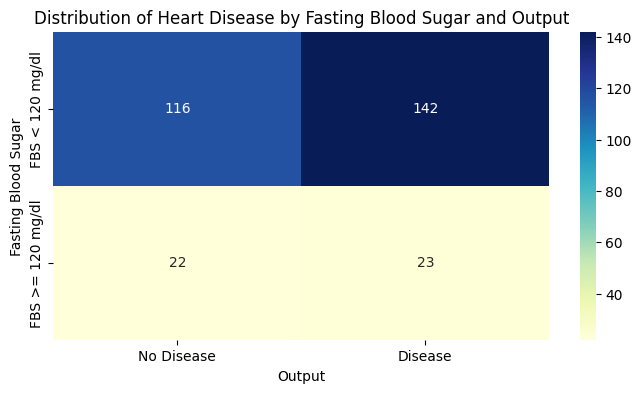

In [ ]:
sex_fbs = data.groupby(['fbs', 'output']).size().unstack().fillna(0)

# Creating a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(sex_fbs, annot=True, cmap="YlGnBu", fmt="d",
            xticklabels=["No Disease", "Disease"],
            yticklabels=["FBS < 120 mg/dl", "FBS >= 120 mg/dl"])
plt.title("Distribution of Heart Disease by Fasting Blood Sugar and Output")
plt.xlabel("Output")
plt.ylabel("Fasting Blood Sugar")
plt.show()

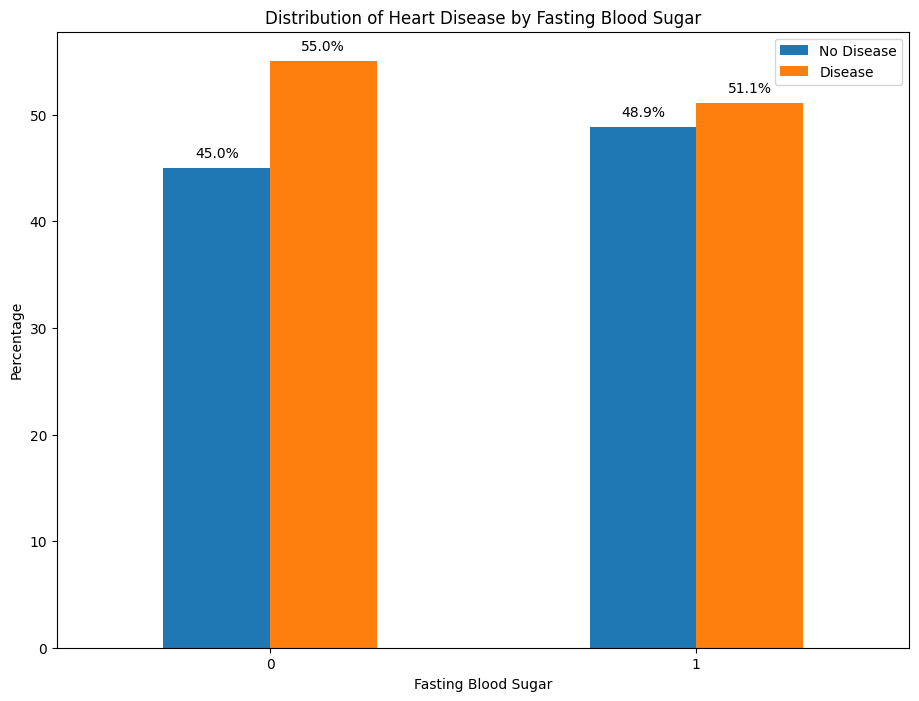

In [ ]:
sex_fbs = data.groupby(['fbs', 'output']).size().unstack().fillna(0)

# for percentages
sex_fbs_percent = sex_fbs.div(sex_fbs.sum(axis=1), axis=0) * 100

# Creating a bar plot
ax = sex_fbs_percent.plot(kind='bar', figsize=(11, 8))
plt.title("Distribution of Heart Disease by Fasting Blood Sugar")
plt.xlabel("Fasting Blood Sugar")
plt.ylabel("Percentage")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)

# Adding percentage labels above bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height + 1), ha='center')

plt.show()

Observations:
There is no significant relation between a person having fasting blood sugar > 120mg/dl and a person having fasting blood sugar < 120mg/dl.
This percentage difference shows that so we can conclude it is not a significant factor to determine if a person has heart disease or not.

In [ ]:
# Number of people that has chest pain in respect to them having heart disease or not
# Value 0: typical angina ,Value 1: atypical angina, Value 2: non-anginal pain , Value 3: asympomatic.
cp_count = data.groupby(['cp', 'output']).size().reset_index().rename(columns={0:'cp_count'})
cp_count

,cp,output,cp_count
0,0,0,104
1,0,1,39
2,1,0,9
3,1,1,41
4,2,0,18
5,2,1,69
6,3,0,7
7,3,1,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

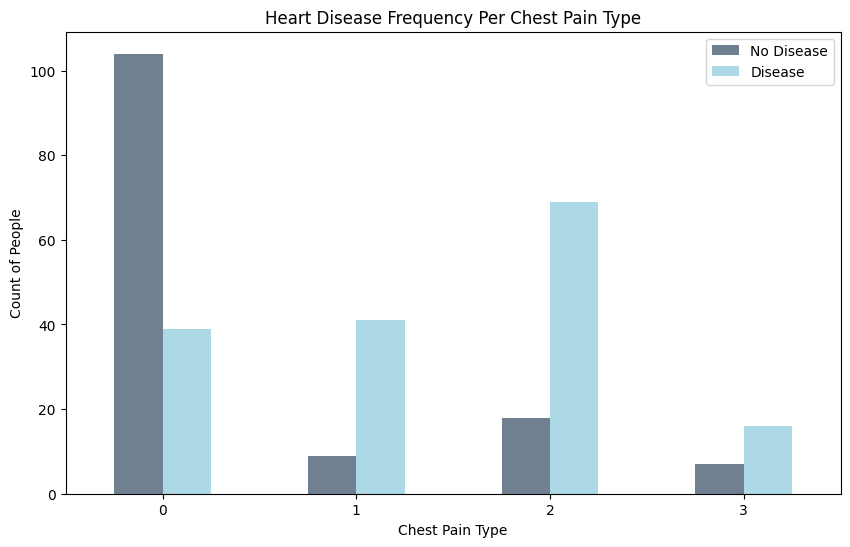

In [ ]:
pd.crosstab(data.cp,data.output).plot(kind="bar",figsize=(10,6),color=["slategrey","lightblue"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count of People")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0)

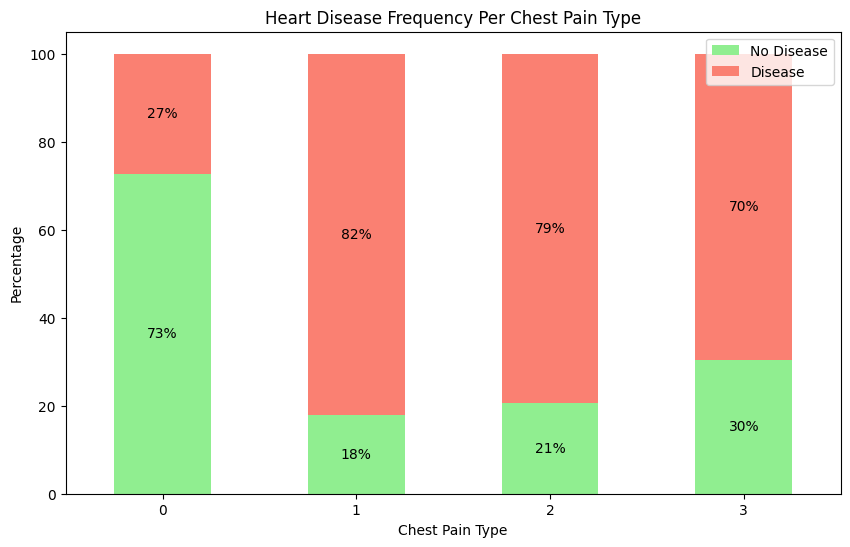

In [ ]:
crosstab = pd.crosstab(data.cp, data.output, normalize='index') * 100

# Creating a stacked bar chart
ax = crosstab.plot(kind="bar", stacked=True, figsize=(10,6), color=["lightgreen","salmon"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Percentage")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0)

# Adding percentage labels inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

# Observations:

* The most concerning is the atypical angina chest pain because 82% of individuals suffering from the type of chest pain ended up having heart disease;
* Followed by non-anginal pain because 79% of the people suffering from this chest pain ended up having heart disease.
* Asympomatic follows with 70%, While typical anginal is not much of a concern to determine if someone with chest pain will have heart disease(27%)

In [ ]:
# Showing results of slp for Females
# Value 0: up sloping, Value 1: flat, Value 2: down sloping
slp_output = data.groupby(['slp', 'output']).size()
slp_output

slp  output
0    0          12
     1           9
1    0          91
     1          49
2    0          35
     1         107
dtype: int64

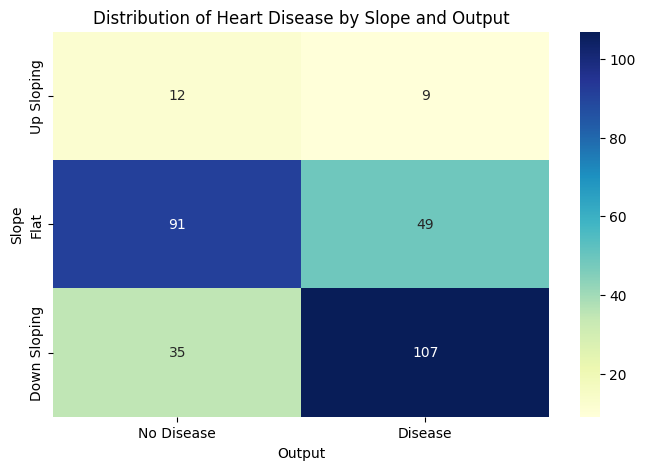

In [ ]:
slp_output = data.groupby(['slp', 'output']).size().unstack().fillna(0)

# Creating a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(slp_output, annot=True, cmap="YlGnBu", fmt="d", xticklabels=["No Disease", "Disease"], yticklabels=["Up Sloping", "Flat", "Down Sloping"])
plt.title("Distribution of Heart Disease by Slope and Output")
plt.xlabel("Output")
plt.ylabel("Slope")
plt.show()

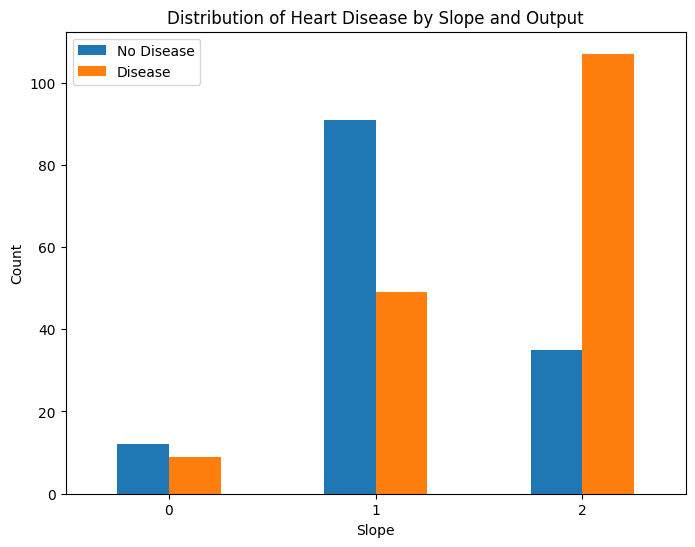

In [ ]:
slp_output = data.groupby(['slp', 'output']).size().unstack().fillna(0)

# Creating a bar chart
slp_output.plot(kind='bar', figsize=(8, 6))
plt.title("Distribution of Heart Disease by Slope and Output")
plt.xlabel("Slope")
plt.ylabel("Count")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)
plt.show()

# Observation:
Downsloping: This pattern is a more concerning issue in our data because 107 out of 142 people ended up having heart disease; followed by the up sloping which 9 of 21,the least concerning is the flat or horizontal ST segment where 49 out of 91 individuals had heart disease.

In [ ]:
# grouping of distinctive age by levels of chest pain
# Value 0: typical angina ,Value 1: atypical angina, Value 2: non-anginal pain , Value 3: asymptomatic.
# The first 10 frequent data
data.groupby(['age', 'cp']).size().reset_index(name='count').sort_values('count', ascending=False).head(10)

,age,cp,count
59,57,0,11
62,58,0,10
70,60,0,7
76,62,0,7
42,51,2,7
52,54,2,7
66,59,0,7
19,43,0,6
13,41,1,6
50,54,0,6


# Oservations:

* The most frequent occurence is people aged 57 experiencing typical angina with 11 occurrences.
* Merely looking at the data I can suggests that typical angina is more common; especially among people in their late 50s and early 60s

In [ ]:
# Correlation table
data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [ ]:
corr_matrix = data.corr()

# The bottom 5 lowest correlation values
lowest_correlations = corr_matrix.unstack().sort_values().head()
print(lowest_correlations)

oldpeak  slp       -0.577537
slp      oldpeak   -0.577537
exng     output    -0.436757
output   exng      -0.436757
oldpeak  output    -0.430696
dtype: float64


In [ ]:
corr_matrix = data.corr()

# The top 10 highest correlation values
highest_correlations = corr_matrix.unstack().sort_values(ascending=False)

# Filtering correlation index with the same index
highest_correlations = highest_correlations[highest_correlations.index.get_level_values(0) != highest_correlations.index.get_level_values(1)]
print(highest_correlations.head())

output    cp          0.433798
cp        output      0.433798
output    thalachh    0.421741
thalachh  output      0.421741
slp       thalachh    0.386784
dtype: float64


# Observations:

* There is a weak positive correlation between age and chol (As age increases, cholesterol levels tend to slightly increase.)
* There is a moderate negative correlation between 'oldpeak' and 'slp' (As ST depression induced by exercise relative to rest increases the slope of the peak exercise ST segment) tends to decrease)
* There is a moderate positive correlation between 'thalachh' and 'output' (Individuals with higher maximum heart rates during exercise might be more likely to have heart disease.)
* I can conclude that there is no strong positive or negative correlation among any of the features.

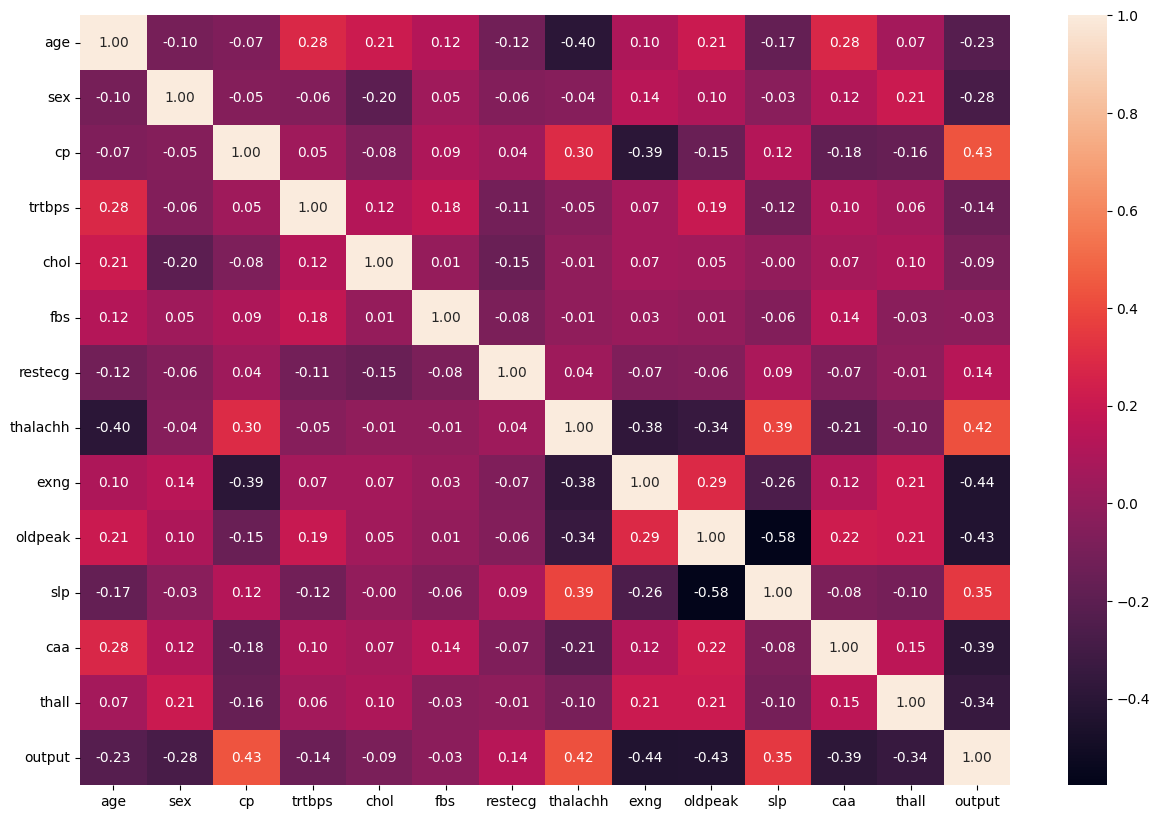

In [ ]:
# Visualise correlation table
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot = True, fmt=".2f")
plt.show()

# Make Predictions

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
X = data.drop('output', axis=1)
y = data['output']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# Create a Logistic Regression model
lr_model = LogisticRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test)

# Evaluate the model
print("\nLogistic Regression Results (Test Set):")
print("Accuracy: {:.2f}".format(accuracy_score(y_test, lr_predictions)))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, lr_predictions))
print("\nClassification Report:\n", classification_report(y_test, lr_predictions))


Logistic Regression Results (Test Set):
Accuracy: 0.89

Confusion Matrix:
 [[25  4]
 [ 3 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Create a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
print("\nRandom Forest Results (Test Set):")
print("Accuracy: {:.2f}".format(accuracy_score(y_test, rf_predictions)))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("\nClassification Report:\n", classification_report(y_test, rf_predictions))


Random Forest Results (Test Set):
Accuracy: 0.84

Confusion Matrix:
 [[24  5]
 [ 5 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [ ]:
# Create a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
gb_predictions = gb_model.predict(X_test)


# Evaluate the model
print("\nGradient Boosting Results (Test Set):")
print("Accuracy: {:.2f}".format(accuracy_score(y_test, gb_predictions)))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, gb_predictions))
print("\nClassification Report:\n", classification_report(y_test, gb_predictions))


Gradient Boosting Results (Test Set):
Accuracy: 0.77

Confusion Matrix:
 [[23  6]
 [ 8 24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.77        29
           1       0.80      0.75      0.77        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



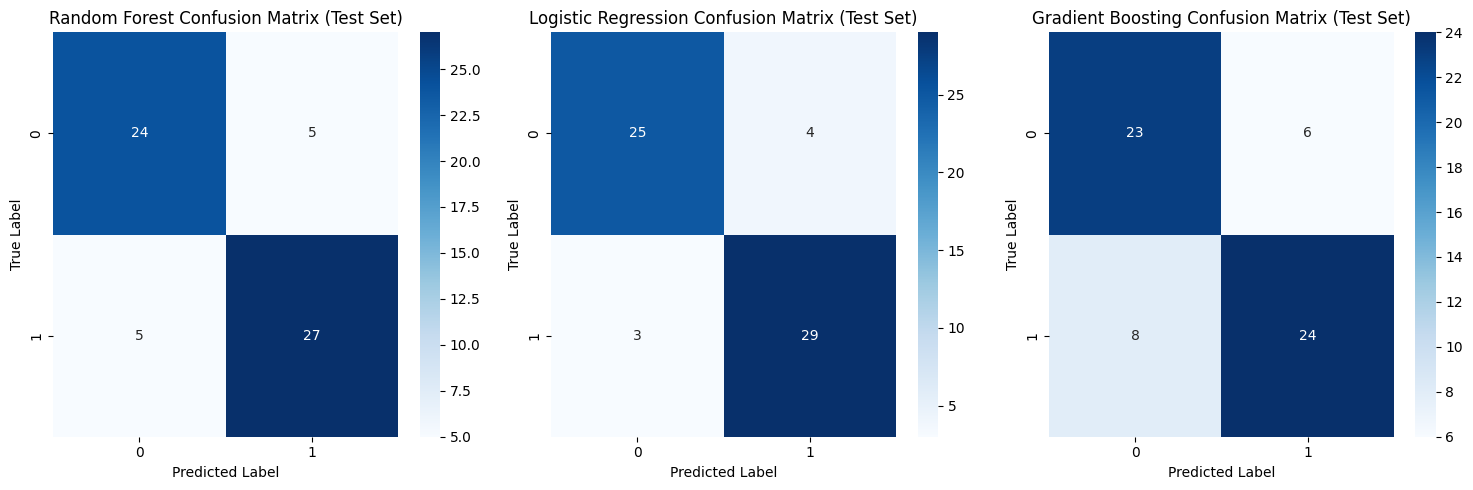

In [ ]:
models = ['Random Forest', 'Logistic Regression', 'Gradient Boosting']
predictions = [rf_predictions, lr_predictions, gb_predictions]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, model in enumerate(models):
    cm = confusion_matrix(y_test, predictions[i])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{model} Confusion Matrix (Test Set)')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

plt.tight_layout()
plt.show()

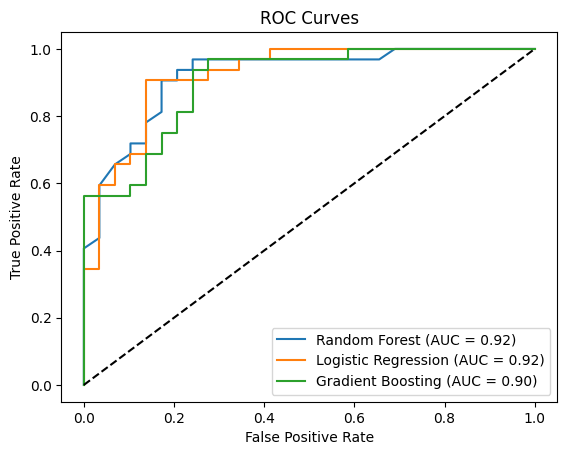

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure()
for model, name in zip([rf_model, lr_model, gb_model], ['Random Forest', 'Logistic Regression', 'Gradient Boosting']):
    y_scores = model.predict_proba(X_test)[:, 1]  # Get probability scores for positive class
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

# Observations:
An AUC (Area Under the Curve) of 92% tells us our model has high discrimatory power; This indicates that both models (Random Forest and Logistic Regression classifier) are very effective at distinguishing between individuals with and without heart disease:
Though it is worth mentioning that both Random Forest and Logistic Regression classifier has an AUC of 92%; But we can see that the logistics regression is less likely to misclassify (confusion matrix) individuals who actually have heart disease as people that do not have compared to Random Forest (which is quite important considering to consider in a medical context) Hence it is recommended our choice of model should be Logistic regression.

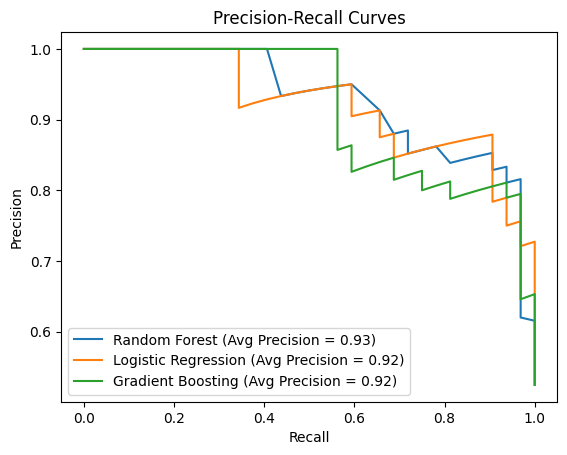

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure()
for model, name in zip([rf_model, lr_model, gb_model], ['Random Forest', 'Logistic Regression', 'Gradient Boosting']):
    y_scores = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    average_precision = average_precision_score(y_test, y_scores)
    plt.plot(recall, precision, label=f'{name} (Avg Precision = {average_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='lower left')
plt.show()

# Observations:
Logistic Regression has a slightly lower precision (92%) compared to the random forest model (93%), but it has fewer false negatives (3 compared to 5). This means logistic regression is better at identifying people who actually have heart disease. Even though Gradient boosting matches with Logistic regression in the precision-recall score, if falls short of Logistic regression in other aspect(Recall and ROC).
* Recommendation:
Logistic Regression would be the model of choice because it results in fewer false negatives, despite having slightly lower precision. In medical diagnostics, ensuring that as few true cases as possible are missed (high recall) is often more important than achieving marginally higher precision.

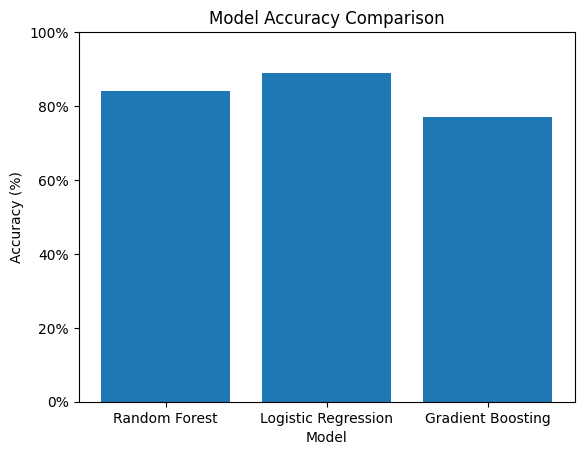

In [ ]:
models = ['Random Forest', 'Logistic Regression', 'Gradient Boosting']
accuracy_scores = [0.84, 0.89, 0.77]

accuracy_percentages = [f'{score * 100:.1f}%' for score in accuracy_scores]

plt.bar(models, accuracy_scores)
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')

plt.yticks(plt.yticks()[0], [f'{tick * 100:.0f}%' for tick in plt.yticks()[0]])

plt.show()

Simply shows that overall Logistics Regression classifier has the best performance metric at 89%; followed by Random Forest classifier at 84%; then in last place is Gradient Boosting at 77%.

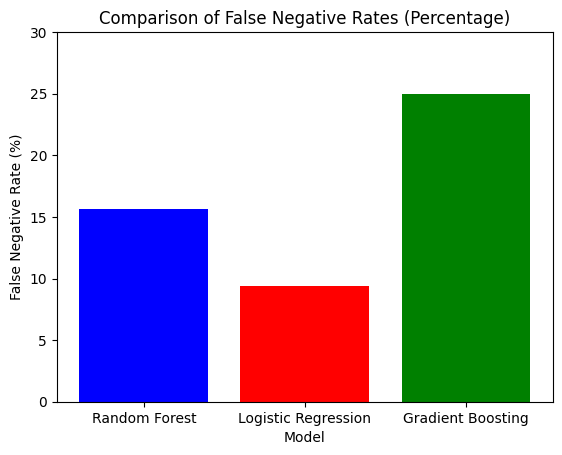

In [ ]:
models = ['Random Forest', 'Logistic Regression', 'Gradient Boosting']
predictions = [rf_predictions, lr_predictions, gb_predictions]
fn_percentages = []

for prediction in predictions:
    cm = confusion_matrix(y_test, prediction)
    fn_rate = cm[1, 0] / (cm[1, 0] + cm[1, 1])
    fn_percentages.append(fn_rate * 100)

colors = ['blue', 'red', 'green']

plt.bar(models, fn_percentages, color=colors)
plt.xlabel('Model')
plt.ylabel('False Negative Rate (%)')
plt.title('Comparison of False Negative Rates (Percentage)')
plt.ylim(0, 30)
plt.show()

# Observation:
The lower false negative rate of the Logistic Regression model indicates that it is less likely to incorrectly classify individuals who actually have heart disease as people who do not have. This makes it a more preferred choice in this context, as minimizing false negatives (missing true cases of heart disease) is crucial for effective medical diagnosis.

# Conclusion:

* Logistics regression is our choice of Model
* I have also done Cross-Validation and there doesn't seem to be a better result than this so hence; I stay with this choice of model.